In [1]:
# http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The way of python

In [3]:
Z = [[0,0,0,0,0,0],
     [0,0,0,1,0,0],
     [0,1,0,1,0,0],
     [0,0,1,1,0,0],
     [0,0,0,0,0,0],
     [0,0,0,0,0,0]]

In [4]:
def compute_neighbors(Z):
  shape = len(Z), len(Z[0])
  N = [[0,]*shape[0] for i in range(shape[1])]
  for x in range(1,shape[0]-1):
    for y in range(1, shape[1]-1):
      N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                + Z[x-1][y]            +Z[x+1][y]   \
                + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
  return N

In [5]:
def iterate(Z):
  N = compute_neighbors(Z)
  shape = len(Z), len(Z[0])
  for x in range(1,shape[0]-1):
    for y in range(1, shape[1]-1):
      if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
        Z[x][y] = 0
      elif Z[x][y] == 0 and N[x][y] == 3:
        Z[x][y] = 1
  return Z

In [6]:
def show(Z):
    for l in Z[1:-1]: print(l[1:-1])
    print()
show(Z)

[0, 0, 1, 0]
[1, 0, 1, 0]
[0, 1, 1, 0]
[0, 0, 0, 0]



In [7]:
for i in range(4):
  iterate(Z)
  show(Z)

[0, 1, 0, 0]
[0, 0, 1, 1]
[0, 1, 1, 0]
[0, 0, 0, 0]

[0, 0, 1, 0]
[0, 0, 0, 1]
[0, 1, 1, 1]
[0, 0, 0, 0]

[0, 0, 0, 0]
[0, 1, 0, 1]
[0, 0, 1, 1]
[0, 0, 1, 0]

[0, 0, 0, 0]
[0, 0, 0, 1]
[0, 1, 0, 1]
[0, 0, 1, 1]



In [8]:
%timeit iterate(Z)

10000 loops, best of 3: 29.6 µs per loop


In [9]:
# The way of numpy

In [10]:
Z = np.array([[0,0,0,0,0,0],
     [0,0,0,1,0,0],
     [0,1,0,1,0,0],
     [0,0,1,1,0,0],
     [0,0,0,0,0,0],
     [0,0,0,0,0,0]])

In [11]:
print(Z[1:-1,1:-1])

[[0 0 1 0]
 [1 0 1 0]
 [0 1 1 0]
 [0 0 0 0]]


In [12]:
A = Z[1:-1,1:-1]

In [13]:
A.base is Z

True

In [14]:
N = np.zeros(Z.shape,dtype=int)
N[1:-1,1:-1] = (Z[ :-2, :-2] + Z[ :-2,1:-1] + Z[ :-2,2:] +
                Z[1:-1, :-2]                + Z[1:-1,2:] +
                Z[2:  , :-2] + Z[2:  ,1:-1] + Z[2:  ,2:])

In [15]:
N

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 3, 1, 2, 0],
       [0, 1, 5, 3, 3, 0],
       [0, 2, 3, 2, 2, 0],
       [0, 1, 2, 2, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [16]:
def naive_iterate(Z):
    # Iterate the game of life : naive version
    N = np.zeros(Z.shape,dtype=int)
    N[1:-1,1:-1] = (Z[ :-2, :-2] + Z[ :-2,1:-1] + Z[ :-2,2:] +
                    Z[1:-1, :-2]                + Z[1:-1,2:] +
                    Z[2:  , :-2] + Z[2:  ,1:-1] + Z[2:  ,2:])
    
    N_ = N.ravel()
    Z_ = Z.ravel()
    
    # Apply rules
    R1 = np.argwhere( Z_ == 1 & N_ < 2)
    R2 = np.argwhere( Z_ == 1 & N_ > 3)
    R3 = np.argwhere( Z_ == 1 & (N_ == 2 | N_ == 3))
    R4 = np.argwhere( Z_ == 0 & N_ == 3)
    
    # Set new values
    Z_[R1] = 0
    Z_[R2] = 0
    Z_[R3] = Z_[R3]
    Z_[R4] = 1
    
    # Make sure borders stay null
    Z[0,:] = Z[-1,:] = Z[:,0] = Z[:,-1] = 0
                     

In [17]:
def faster_iterate(Z):
    # Count neighbours
    N = (Z[0:-2,0:-2] + Z[0:-2,1:-1] + Z[0:-2,2:] +
         Z[1:-1,0:-2]                + Z[1:-1,2:] +
         Z[2:  ,0:-2] + Z[2:  ,1:-1] + Z[2:  ,2:])
    
    # Apply rules
    birth = (N==3) & (Z[1:-1,1:-1] == 0)
    survive = ((N==2) | (N==3)) & (Z[1:-1,1:-1] == 1)
    Z[...] = 0
    Z[1:-1,1:-1][birth | survive] = 1
    return Z

In [18]:
print(A)

[[0 0 1 0]
 [1 0 1 0]
 [0 1 1 0]
 [0 0 0 0]]


In [19]:
for i in range(4):
    faster_iterate(Z)
    print("Step: ",i+1)
    print(A)

Step:  1
[[0 1 0 0]
 [0 0 1 1]
 [0 1 1 0]
 [0 0 0 0]]
Step:  2
[[0 0 1 0]
 [0 0 0 1]
 [0 1 1 1]
 [0 0 0 0]]
Step:  3
[[0 0 0 0]
 [0 1 0 1]
 [0 0 1 1]
 [0 0 1 0]]
Step:  4
[[0 0 0 0]
 [0 0 0 1]
 [0 1 0 1]
 [0 0 1 1]]


In [20]:
# Getting Bigger

In [21]:
Z = np.random.randint(0,2,(256,512))

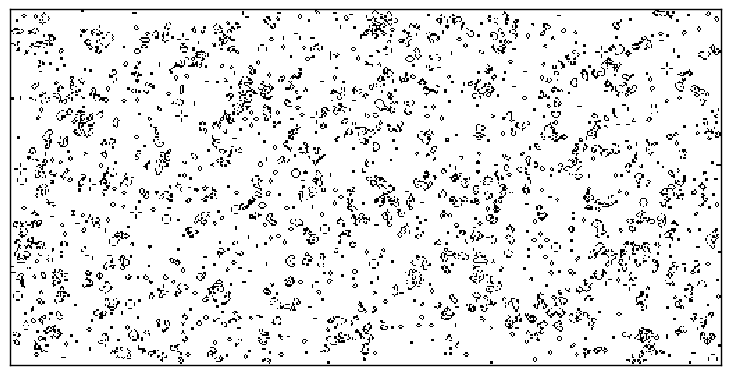

In [22]:
for i in range(100): faster_iterate(Z)
size = np.array(Z.shape)
dpi = 72.0
figsize = size[1]/float(dpi), size[0]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi, facecolor='white')
fig.add_axes([0.0,0.0,1.0,1.0])
plt.imshow(Z, interpolation='nearest', cmap = plt.cm.gray_r)
plt.xticks([]), plt.yticks([])
plt.show()

In [23]:
# A step further

/home/altock/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/altock/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


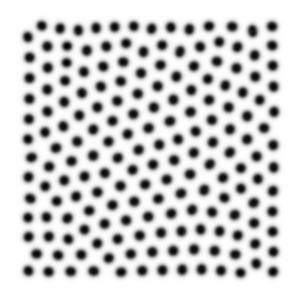

In [24]:
# TODO: WTF
import numpy as np
import matplotlib.pyplot as plt


# Parameters from http://www.aliensaint.com/uo/java/rd/
# -----------------------------------------------------
n  = 200
Du, Dv, F, k = 0.16, 0.08, 0.035, 0.065 # Bacteria 1
# Du, Dv, F, k = 0.14, 0.06, 0.035, 0.065 # Bacteria 2
# Du, Dv, F, k = 0.16, 0.08, 0.060, 0.062 # Coral
# Du, Dv, F, k = 0.19, 0.05, 0.060, 0.062 # Fingerprint
# Du, Dv, F, k = 0.10, 0.10, 0.018, 0.050 # Spirals
# Du, Dv, F, k = 0.12, 0.08, 0.020, 0.050 # Spirals Dense
# Du, Dv, F, k = 0.10, 0.16, 0.020, 0.050 # Spirals Fast
# Du, Dv, F, k = 0.16, 0.08, 0.020, 0.055 # Unstable
# Du, Dv, F, k = 0.16, 0.08, 0.050, 0.065 # Worms 1
# Du, Dv, F, k = 0.16, 0.08, 0.054, 0.063 # Worms 2
# Du, Dv, F, k = 0.16, 0.08, 0.035, 0.060 # Zebrafish


Z = np.zeros((n+2,n+2), [('U', np.double), ('V', np.double)])
U,V = Z['U'], Z['V']
u,v = U[1:-1,1:-1], V[1:-1,1:-1]

r = 20
u[...] = 1.0
U[n/2-r:n/2+r,n/2-r:n/2+r] = 0.50
V[n/2-r:n/2+r,n/2-r:n/2+r] = 0.25
u += 0.05*np.random.random((n,n))
v += 0.05*np.random.random((n,n))


plt.ion()

size = np.array(Z.shape)
dpi = 72.0
figsize= size[1]/float(dpi),size[0]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi, facecolor="white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
im = plt.imshow(V, interpolation='bicubic', cmap=plt.cm.gray_r)
plt.xticks([]), plt.yticks([])


for i in range(25000):
    Lu = (                 U[0:-2,1:-1] +
          U[1:-1,0:-2] - 4*U[1:-1,1:-1] + U[1:-1,2:] +
                           U[2:  ,1:-1] )
    Lv = (                 V[0:-2,1:-1] +
          V[1:-1,0:-2] - 4*V[1:-1,1:-1] + V[1:-1,2:] +
                           V[2:  ,1:-1] )

    uvv = u*v*v
    u += (Du*Lu - uvv +  F   *(1-u))
    v += (Dv*Lv + uvv - (F+k)*v    )

    if i % 10 == 0:
        im.set_data(V)
        im.set_clim(vmin=V.min(), vmax=V.max())
        plt.draw()
        # To make movie
        # plt.savefig("./tmp/tmp-%03d.png" % (i/10) ,dpi=dpi)

plt.ioff()
# plt.savefig("../figures/zebra.png",dpi=dpi)
# plt.savefig("../figures/bacteria.png",dpi=dpi)
# plt.savefig("../figures/fingerprint.png",dpi=dpi)
plt.show()

In [25]:
n = 200
Z = np.zeros((n+2,n+2), [('U', np.double),('V', np.double)])
print(Z.dtype)

[('U', '<f8'), ('V', '<f8')]


In [26]:
U,V = Z['U'], Z['V']
u,v = U[1:-1,1:-1], V[1:-1,1:-1]

In [27]:
def laplacian(Z):
    return (                 Z[0:-2,1:-1] +
            Z[1:-1,0:-2] - 4*Z[1:-1,1:-1] + Z[1:-1,2:] +
                             Z[2:  ,1:-1] )

In [28]:
for i in xrange(25000):
    Lu = laplacian(U)
    Lv = laplacian(V)
    uvv = u*v*v
    u += (Du*Lu - uvv +  F   *(1-u))
    v += (Dv*Lv + uvv - (F+k)*v    )

NameError: name 'xrange' is not defined

In [ ]:
# Neophyte
# 1
# import numpy as np

# 2
print(np.__version__)
print(np.__config__.show())

# 3
np.zeros(10)

In [ ]:
# 4
z = np.zeros(10)
z[4] = 1

In [ ]:
# 5
z = np.arange(10,99)

In [ ]:
# 6
z = np.arange(9).reshape((3,3))
z

In [ ]:
# 7 
x = [1,2,0,0,4,0]
np.nonzero(x)

In [ ]:
# 8
y = np.eye(3)

In [ ]:
# 9
np.diag(np.arange(1,5),k=-1)

In [ ]:
Z = np.random.rand(10,10,10)
Z.shape

In [ ]:
# Novice
# 1
x = np.zeros((8,8))
x[::2,::2] = 1
x[1::2,1::2] = 1
x

In [ ]:
# 2
x = np.random.rand(10,10)
print(np.min(x), np.max(x))

In [ ]:
print(x.min(), x.max())

In [ ]:
# 3
np.tile([[0,1],[1,0]],(4,4))

In [ ]:
# 4
z = np.random.randn(5,5)
z_max, z_min = z.max(), z.min()
z_ = (z - z_min)/ (z_max - z_min)
z_

In [ ]:
# 5
np.matmul(np.random.rand(5,3), np.random.rand(3,2))
# print(np.dot(np.ones((5,3)), np.ones((3,2))))

In [ ]:
# 6
np.tile(np.arange(10),(10,1))

In [ ]:
# 7 
np.arange(1,1001) / 1001 
# np.linspace(0,1,1002,endpoint=True)[1:-1]


In [ ]:
# 8
sorted(np.random.rand(100))

In [ ]:
# 9
np.allclose(np.random.rand(5,5),np.random.rand(5,5))

In [ ]:
# 10
np.random.rand(1000).mean()

In [ ]:
# Apprentice

In [ ]:
# 1